# **Lab Exercise 1:** Understanding PCA with a Simple Dataset

## 1. Load the Dataset:

**Use the Iris dataset (available in sklearn or seaborn) which contains 4 features
and 3 classes.**

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
# Load the Iris dataset from seaborn
data = sns.load_dataset('iris')

print(data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


**Perform a quick exploratory data analysis (EDA) to visualize the data and identify
potential patterns.**

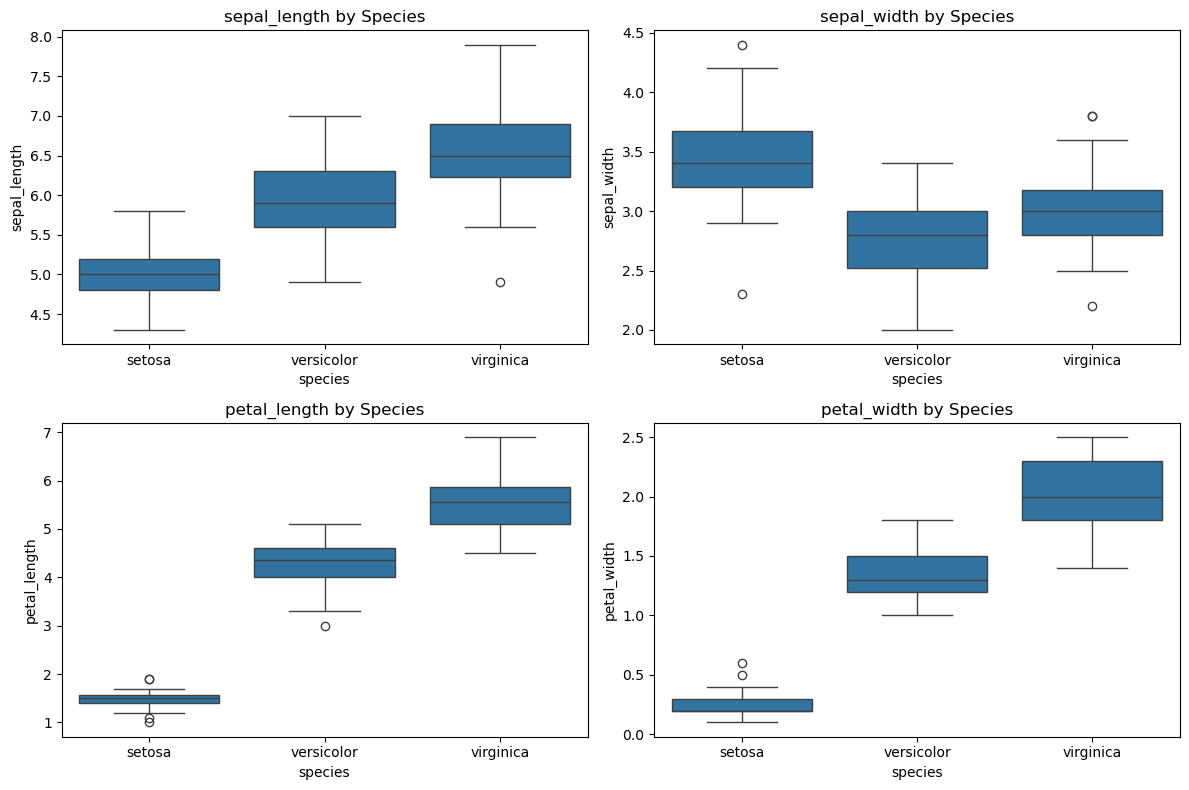

In [7]:
# Create boxplots to see the distribution of features by species
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, feature in zip(axes.flatten(), data.columns[:-1]):
    sns.boxplot(x='species', y=feature, data=data, ax=ax)
    ax.set_title(f'{feature} by Species')

plt.tight_layout()
plt.show()


## 2. Standardization:

**Standardize the features so that they have a mean of 0 and a standard deviation
of 1.**

In [10]:
from sklearn.preprocessing import StandardScaler

X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
scaler = StandardScaler()

In [11]:
X_standardized = scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

In [12]:
print(X_standardized_df.head())

   sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.019004     -1.340227    -1.315444
1     -1.143017    -0.131979     -1.340227    -1.315444
2     -1.385353     0.328414     -1.397064    -1.315444
3     -1.506521     0.098217     -1.283389    -1.315444
4     -1.021849     1.249201     -1.340227    -1.315444


## 3. Compute the Covariance Matrix:

**Calculate the covariance matrix of the standardized data.**

In [15]:
import numpy as np

cov_matrix = np.cov(X_standardized.T)

In [16]:
print(cov_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


## 4. Eigenvalues and Eigenvectors:

**Calculate the eigenvalues and eigenvectors of the covariance matrix.**

In [19]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:")
print(eigenvalues)

Eigenvalues:
[2.93808505 0.9201649  0.14774182 0.02085386]


In [20]:
print("\nEigenvectors:")
print(eigenvectors)


Eigenvectors:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


 ## 5. PCA Transformation:

**Sort the eigenvectors by the magnitude of their corresponding eigenvalues.**

In [23]:
sorted_indices = np.argsort(eigenvalues)[::-1]  
sorted_eigenvalues = eigenvalues[sorted_indices] 
sorted_eigenvectors = eigenvectors[:, sorted_indices] 

In [24]:
print("Sorted Eigenvalues:")
print(sorted_eigenvalues)

Sorted Eigenvalues:
[2.93808505 0.9201649  0.14774182 0.02085386]


In [25]:
print("\nSorted Eigenvectors:")
print(sorted_eigenvectors)


Sorted Eigenvectors:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


**Project the data onto the first two principal components.**

In [27]:
top_2_eigenvectors = sorted_eigenvectors[:, :2]

X_pca = np.dot(X_standardized, top_2_eigenvectors)

X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

In [28]:
print(X_pca_df.head())

        PC1       PC2
0 -2.264703 -0.480027
1 -2.080961  0.674134
2 -2.364229  0.341908
3 -2.299384  0.597395
4 -2.389842 -0.646835


## 6. Visualization:

**Create a scatter plot of the data in the new 2D space defined by the first two
principal components. Use different colors for each class in the Iris dataset.**

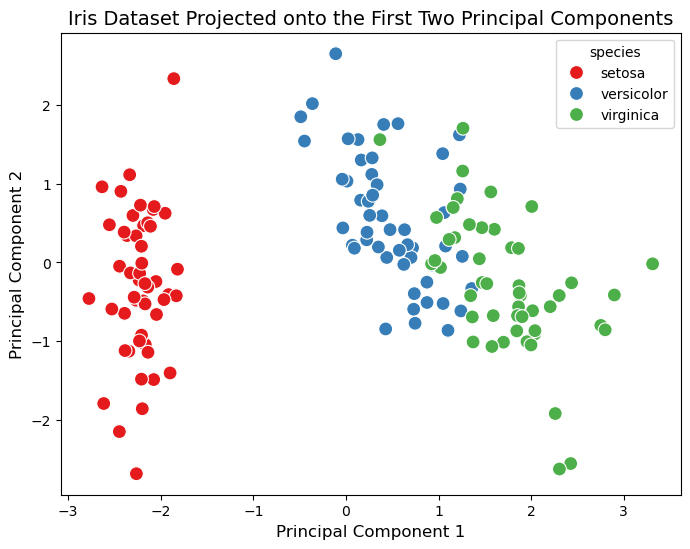

In [31]:
import matplotlib.pyplot as plt

X_pca_df['species'] = data['species']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=X_pca_df, palette='Set1', s=100)

plt.title("Iris Dataset Projected onto the First Two Principal Components", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)

plt.show()


# **Lab Exercise 2:** PCA for Image Compression

## 1. Load an Image:

**Load a grayscale image (e.g., a 256x256 image of a face or any simple object).**

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io

In [36]:
image = io.imread(r"C:\Users\guntu\Downloads\image-1.jpeg", as_gray=True)  # Provide the correct path to your image
image_resized = np.array(image)

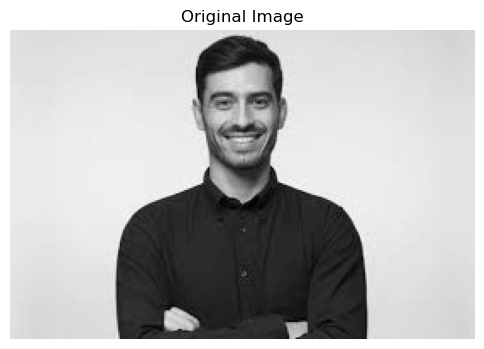

In [37]:
plt.figure(figsize=(6, 6))
plt.imshow(image_resized, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

## 2. Reshape the Image:

**Treat the image as a matrix and flatten it to a 2D matrix where each row is a pixel
and each column is a feature (intensity values of pixels).**

In [40]:
print(f"Original image shape: {image.shape}")

Original image shape: (183, 275)


In [41]:
X = image_resized.reshape(-1, image_resized.shape[1])


In [42]:
print("Shape of reshaped image: ", X.shape)

Shape of reshaped image:  (183, 275)


## 3. Apply PCA:

**Perform PCA on the image data, reducing the number of principal components
used for reconstruction.**

In [45]:
from sklearn.decomposition import PCA

In [46]:
def apply_pca_and_reconstruct(X, num_components):
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X)  # Applying PCA
    X_reconstructed = pca.inverse_transform(X_pca)  # Reconstructing the image from the PCA components
    return X_reconstructed

In [47]:
X_reconstructed_50 = apply_pca_and_reconstruct(X, 50)

In [48]:
image_reconstructed_50 = X_reconstructed_50.reshape(image_resized.shape)

## 4. Reconstruction:

**Reconstruct the image using a different number of principal components (e.g., 5,
20, 50, 100).**

In [51]:
components_list = [5, 20, 50, 100]
reconstructed_images = []

In [52]:
for n in components_list:
    X_reconstructed = apply_pca_and_reconstruct(X, n)
    reconstructed_images.append(X_reconstructed.reshape(image_resized.shape))

## 5. Visualize Results

**Display the original image and the reconstructed images at various levels of
dimensionality reduction.**

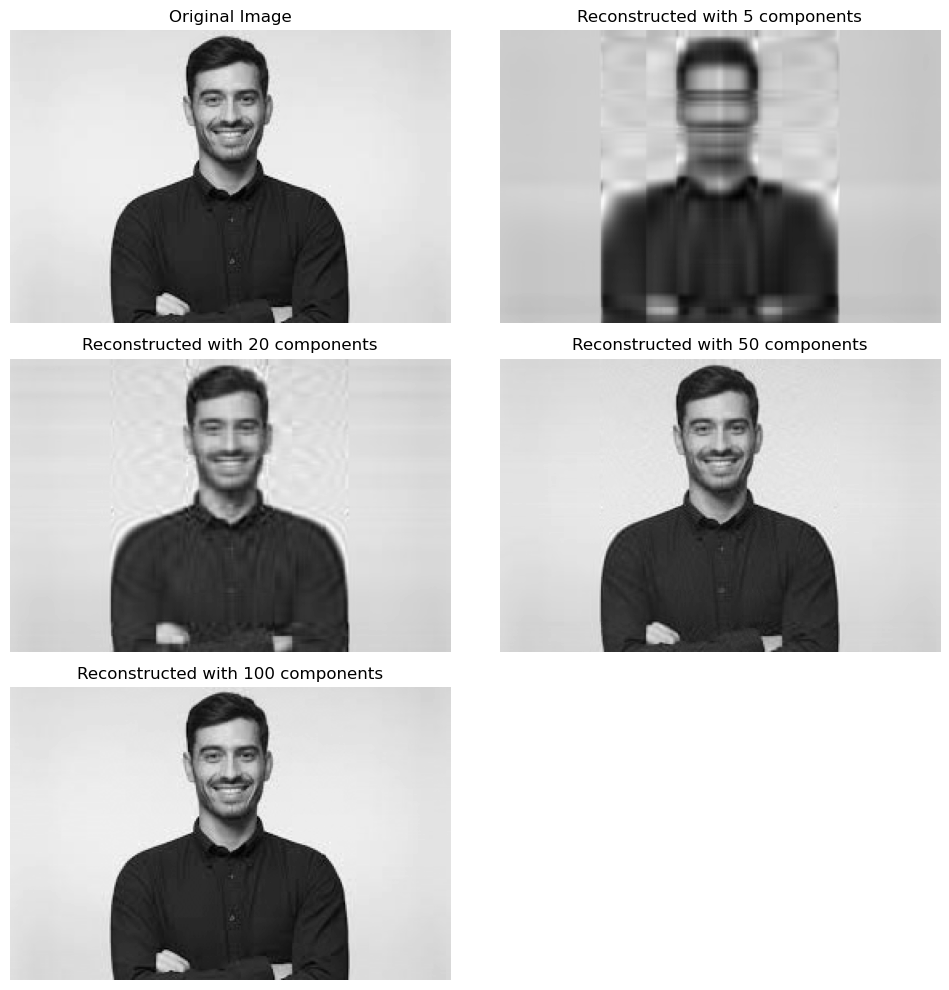

In [55]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.imshow(image_resized, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, n in enumerate(components_list):
    plt.subplot(3, 2, i+2)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title(f'Reconstructed with {n} components')
    plt.axis('off')

plt.tight_layout()
plt.show()


# **Lab Exercise 3:** PCA for Feature Reduction in a Classification Task

## 1. Load a Dataset:

**Use a dataset with many features, such as the Wine dataset from sklearn, which
has 13 features.**

In [59]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA

In [60]:
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Labels

In [61]:
print("Feature shape:", X.shape)

Feature shape: (178, 13)


## 2. Split the Data:

**Split the data into training and testing sets (e.g., 70% training, 30% testing).**

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Baseline Model (No PCA):

**Train a classification model (e.g., Logistic Regression or SVM) on the raw
dataset without applying PCA. Evaluate its performance using accuracy,
precision, and recall.**

In [68]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [69]:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

In [70]:
print("Baseline Model (No PCA) - Logistic Regression")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Baseline Model (No PCA) - Logistic Regression
Accuracy: 0.9815
Precision: 0.9825
Recall: 0.9841


## Apply PCA:

**Apply PCA to the training data, retaining different numbers of components (e.g.,
2, 5, 10).**

In [73]:
components_list = [2, 5, 10]

In [74]:
X_train_pca_list = []  # Reduced training data for each PCA run
pca_models = []  

In [75]:
for n in components_list:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)  # Fit PCA and transform the training data
    X_train_pca_list.append(X_train_pca)      # Store the reduced training data
    pca_models.append(pca)                    # Store the PCA model for later use on test data

    print(f"Training data transformed with {n} components. Shape: {X_train_pca.shape}")

Training data transformed with 2 components. Shape: (124, 2)
Training data transformed with 5 components. Shape: (124, 5)
Training data transformed with 10 components. Shape: (124, 10)


**Project the test data onto the same principal components.**

In [77]:
X_test_pca_list = []

In [78]:
for i, pca in enumerate(pca_models):
    X_test_pca = pca.transform(X_test)  # Transform the test data using the same PCA model
    X_test_pca_list.append(X_test_pca)  # Store the reduced test data

    print(f"Test data transformed with {components_list[i]} components. Shape: {X_test_pca.shape}")

Test data transformed with 2 components. Shape: (54, 2)
Test data transformed with 5 components. Shape: (54, 5)
Test data transformed with 10 components. Shape: (54, 10)


## 5. Train and Evaluate:

**Train the same classification model on the reduced dataset.**

In [81]:
results = []

In [82]:
for i, n in enumerate(components_list):
    log_reg_pca = LogisticRegression(max_iter=10000)
    log_reg_pca.fit(X_train_pca_list[i], y_train)

    # Evaluate performance
    y_pred_pca = log_reg_pca.predict(X_test_pca_list[i])
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    precision_pca = precision_score(y_test, y_pred_pca, average='macro')
    recall_pca = recall_score(y_test, y_pred_pca, average='macro')
    
    results.append({
        'components': n,
        'accuracy': accuracy_pca,
        'precision': precision_pca,
        'recall': recall_pca
    })
    print(f"\nModel with {n} PCA components:")
    print(f"Accuracy: {accuracy_pca:.4f}")
    print(f"Precision: {precision_pca:.4f}")
    print(f"Recall: {recall_pca:.4f}")


Model with 2 PCA components:
Accuracy: 0.9444
Precision: 0.9501
Recall: 0.9471

Model with 5 PCA components:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000

Model with 10 PCA components:
Accuracy: 0.9815
Precision: 0.9825
Recall: 0.9841


## 6. Visualization:

**Plot a graph showing how accuracy changes as the number of components
increases.**

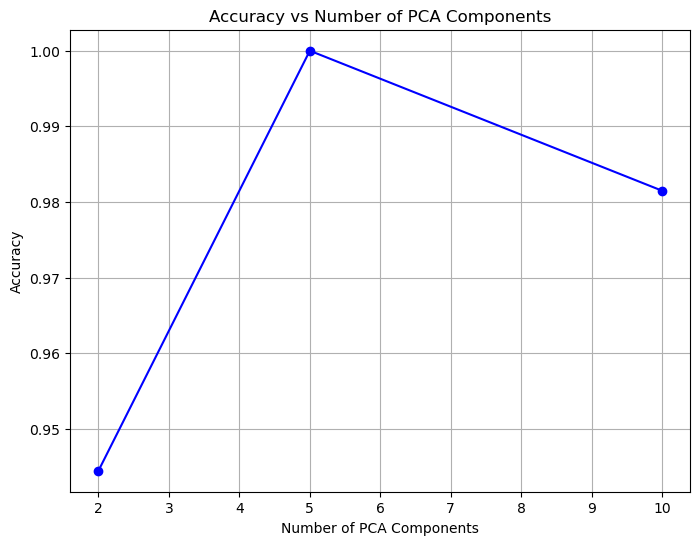

In [85]:
components = [result['components'] for result in results]
accuracies = [result['accuracy'] for result in results]

plt.figure(figsize=(8, 6))
plt.plot(components, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()